In [1]:
import cv2
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import os

In [2]:
os.chdir('/content/drive/MyDrive/DeepLearningColab/CNN/UGV')

# Data Exploration

In [3]:
df_joy = pd.read_csv("Out_Joystick.csv")
df_img = pd.read_csv("out_images.csv")

In [4]:
df_joy = df_joy.drop(df_joy.columns[0],axis=1)
df_img = df_img.drop(df_img.columns[0],axis=1)

In [5]:
df_img[150:171]

image                        time
150  150.jpg  2022-05-31 15:23:07.306242
151  151.jpg  2022-05-31 15:23:07.338265
152  152.jpg  2022-05-31 15:23:07.370901
153  153.jpg  2022-05-31 15:23:07.404282
154  154.jpg  2022-05-31 15:23:07.439113
155  155.jpg  2022-05-31 15:23:07.473303
156  156.jpg  2022-05-31 15:23:07.504517
157  157.jpg  2022-05-31 15:23:07.537420
158  158.jpg  2022-05-31 15:23:07.571747
159  159.jpg  2022-05-31 15:23:07.604374
160  160.jpg  2022-05-31 15:23:07.639381
161  161.jpg  2022-05-31 15:23:07.673381
162  162.jpg  2022-05-31 15:23:07.704570
163  163.jpg  2022-05-31 15:23:07.737328
164  164.jpg  2022-05-31 15:23:07.772756
165  165.jpg  2022-05-31 15:23:07.807358
166  166.jpg  2022-05-31 15:23:07.837375
167  167.jpg  2022-05-31 15:23:07.873058
168  168.jpg  2022-05-31 15:23:07.904528
169  169.jpg  2022-05-31 15:23:07.938151
170  170.jpg  2022-05-31 15:23:07.980250

In [6]:
df_joy[305:367]

X    Y                        Time
305  568  926  2022-05-31 15:23:07.307990
306  576  928  2022-05-31 15:23:07.318603
307  581  929  2022-05-31 15:23:07.329504
308  588  932  2022-05-31 15:23:07.338037
309  594  931  2022-05-31 15:23:07.350769
..   ...  ...                         ...
362  772  798  2022-05-31 15:23:07.958007
363  778  791  2022-05-31 15:23:07.968806
364  784  783  2022-05-31 15:23:07.981541
365  787  779  2022-05-31 15:23:07.994015
366  791  774  2022-05-31 15:23:08.002663

[62 rows x 3 columns]

In [7]:
df_joy[305:330]

X    Y                        Time
305  568  926  2022-05-31 15:23:07.307990
306  576  928  2022-05-31 15:23:07.318603
307  581  929  2022-05-31 15:23:07.329504
308  588  932  2022-05-31 15:23:07.338037
309  594  931  2022-05-31 15:23:07.350769
310  596  932  2022-05-31 15:23:07.364555
311  600  935  2022-05-31 15:23:07.382022
312  602  936  2022-05-31 15:23:07.385399
313  602  934  2022-05-31 15:23:07.396491
314  602  937  2022-05-31 15:23:07.408337
315  604  935  2022-05-31 15:23:07.421487
316  606  937  2022-05-31 15:23:07.433137
317  609  939  2022-05-31 15:23:07.443609
318  612  940  2022-05-31 15:23:07.453586
319  615  939  2022-05-31 15:23:07.465196
320  618  942  2022-05-31 15:23:07.481739
321  623  941  2022-05-31 15:23:07.492171
322  625  946  2022-05-31 15:23:07.498181
323  625  945  2022-05-31 15:23:07.513319
324  626  945  2022-05-31 15:23:07.522923
325  626  948  2022-05-31 15:23:07.537074
326  626  948  2022-05-31 15:23:07.546488
327  626  950  2022-05-31 15:23:07.557319
328  627  949  2022-05-31 15:23:07.566996
329  626  949  2022-05-31 15:23:07.582559

In [8]:
df_img["time"].apply(lambda x : x.split()[1].split(':')[-1][0:4].split('.')[0])

0       02
1       02
2       02
3       02
4       02
        ..
1385    48
1386    48
1387    48
1388    48
1389    48
Name: time, Length: 1390, dtype: object

In [9]:
df_img["sec"] = df_img["time"].apply(lambda x : int(x.split()[1].split(':')[-1][0:4].split('.')[0]))
df_img["micro"] = df_img["time"].apply(lambda x : int(x.split()[1].split(':')[-1][0:4].split('.')[1]))

In [10]:
df_joy["sec"] = df_joy["Time"].apply(lambda x : int(x.split()[1].split(':')[-1][0:4].split('.')[0]))
df_joy["micro"] = df_joy["Time"].apply(lambda x : int(x.split()[1].split(':')[-1][0:4].split('.')[1]))

In [11]:
df_joy.head()

X    Y                        Time  sec  micro
0  511  526  2022-05-31 15:23:03.717301    3      7
1  511  526  2022-05-31 15:23:03.807477    3      8
2  511  526  2022-05-31 15:23:03.818204    3      8
3  510  526  2022-05-31 15:23:03.830787    3      8
4  511  526  2022-05-31 15:23:03.837382    3      8

In [12]:
for i in df_img["sec"].unique():
  print(f"sec of {i}", "Count",df_img[df_img["sec"] == i].count()["sec"])

sec of 2 Count 21
sec of 3 Count 30
sec of 4 Count 30
sec of 5 Count 30
sec of 6 Count 30
sec of 7 Count 30
sec of 8 Count 30
sec of 9 Count 30
sec of 10 Count 30
sec of 11 Count 30
sec of 12 Count 30
sec of 13 Count 30
sec of 14 Count 30
sec of 15 Count 30
sec of 16 Count 30
sec of 17 Count 30
sec of 18 Count 30
sec of 19 Count 30
sec of 20 Count 30
sec of 21 Count 30
sec of 22 Count 30
sec of 23 Count 30
sec of 24 Count 30
sec of 25 Count 30
sec of 26 Count 31
sec of 27 Count 29
sec of 28 Count 31
sec of 29 Count 29
sec of 30 Count 30
sec of 31 Count 31
sec of 32 Count 30
sec of 33 Count 30
sec of 34 Count 29
sec of 35 Count 30
sec of 36 Count 31
sec of 37 Count 30
sec of 38 Count 29
sec of 39 Count 30
sec of 40 Count 30
sec of 41 Count 31
sec of 42 Count 29
sec of 43 Count 31
sec of 44 Count 30
sec of 45 Count 30
sec of 46 Count 30
sec of 47 Count 29
sec of 48 Count 19


In [13]:
for i in df_joy["sec"].unique():
  print(f"sec of {i}", "Count",df_joy[df_joy["sec"] == i].count()["sec"])

sec of 3 Count 18
sec of 4 Count 88
sec of 5 Count 86
sec of 6 Count 87
sec of 7 Count 87
sec of 8 Count 88
sec of 9 Count 85
sec of 10 Count 85
sec of 11 Count 80
sec of 12 Count 68
sec of 13 Count 83
sec of 14 Count 76
sec of 15 Count 87
sec of 16 Count 83
sec of 17 Count 85
sec of 18 Count 86
sec of 19 Count 87
sec of 20 Count 86
sec of 21 Count 85
sec of 22 Count 82
sec of 23 Count 86
sec of 24 Count 85
sec of 25 Count 80
sec of 26 Count 77
sec of 27 Count 86
sec of 28 Count 87
sec of 29 Count 83
sec of 30 Count 83
sec of 31 Count 83
sec of 32 Count 81
sec of 33 Count 87
sec of 34 Count 80
sec of 35 Count 80
sec of 36 Count 83
sec of 37 Count 80
sec of 38 Count 32
sec of 39 Count 18
sec of 40 Count 12
sec of 41 Count 19
sec of 42 Count 81
sec of 43 Count 70
sec of 44 Count 87
sec of 45 Count 78
sec of 46 Count 32


# Data Preparation 

In [14]:
df_img = df_img[21:]

In [15]:
np.random.choice(3)

2

In [16]:
df_img = df_img[(df_img["sec"] >=3) & (df_img["sec"] <= 46)]
df_joy = df_joy[(df_joy["sec"] >=3) & (df_joy["sec"] <= 46)]

In [17]:
df_img = df_img.reset_index().drop(["index","time"],axis=1)
df_joy = df_joy.reset_index().drop(["index","Time"],axis=1)

# Image Data Selection 

In [18]:
values = []
for i in df_img["sec"].unique():
  for j in df_img[(df_img["sec"] == i)]["micro"].unique():
    data = df_img[(df_img["sec"] == i) & (df_img["micro"] == j)].sample(n=1).values
    values.append(data[0])

In [19]:
new_img_df = pd.DataFrame(values,columns=df_img.columns)

In [20]:
new_img_df = new_img_df[3:].reset_index().drop("index",axis=1)

In [21]:
new_img_df.groupby("sec").count()

image  micro
sec              
3        7      7
4       10     10
5       10     10
6       10     10
7       10     10
8       10     10
9       10     10
10      10     10
11      10     10
12      10     10
13      10     10
14      10     10
15      10     10
16      10     10
17      10     10
18      10     10
19      10     10
20      10     10
21      10     10
22      10     10
23      10     10
24      10     10
25      10     10
26      10     10
27      10     10
28      10     10
29      10     10
30      10     10
31      10     10
32      10     10
33      10     10
34      10     10
35      10     10
36      10     10
37      10     10
38      10     10
39      10     10
40      10     10
41      10     10
42      10     10
43      10     10
44      10     10
45      10     10
46      10     10

In [22]:
new_img_df.__len__()

437

# Joy Stick Data Selection

In [23]:
df_joy = df_joy[18:].reset_index().drop("index",axis=1)
df_joy.head()

X    Y  sec  micro
0  510  526    4      0
1  511  526    4      0
2  511  526    4      0
3  511  526    4      0
4  511  526    4      0

In [24]:
values = []
for i in df_joy["sec"].unique():
  for j in df_joy[(df_joy["sec"] == i)]["micro"].unique():
    data = df_joy[(df_joy["sec"] == i) & (df_joy["micro"] == j)].mean()
    values.append(data.astype(int).values)

In [25]:
new_joy_df = pd.DataFrame(values,columns=df_joy.columns)

In [26]:
new_joy_df.groupby("sec").count()

X   Y  micro
sec               
4    10  10     10
5    10  10     10
6    10  10     10
7    10  10     10
8    10  10     10
9    10  10     10
10   10  10     10
11   10  10     10
12   10  10     10
13   10  10     10
14   10  10     10
15   10  10     10
16   10  10     10
17   10  10     10
18   10  10     10
19   10  10     10
20   10  10     10
21   10  10     10
22   10  10     10
23   10  10     10
24   10  10     10
25   10  10     10
26   10  10     10
27   10  10     10
28   10  10     10
29   10  10     10
30   10  10     10
31   10  10     10
32   10  10     10
33   10  10     10
34   10  10     10
35   10  10     10
36   10  10     10
37   10  10     10
38   10  10     10
39    7   7      7
40    6   6      6
41    5   5      5
42   10  10     10
43    9   9      9
44   10  10     10
45   10  10     10
46    4   4      4

In [27]:
new_img_df

image  sec  micro
0      31.jpg    3      3
1      33.jpg    3      4
2      38.jpg    3      5
3      39.jpg    3      6
4      42.jpg    3      7
..        ...  ...    ...
432  1328.jpg   46      5
433  1331.jpg   46      6
434  1335.jpg   46      7
435  1338.jpg   46      8
436  1341.jpg   46      9

[437 rows x 3 columns]

In [28]:
new_joy_df

X    Y  sec  micro
0    510  526    4      0
1    510  526    4      1
2    511  526    4      2
3    511  526    4      3
4    511  526    4      4
..   ...  ...  ...    ...
406  511  821   45      9
407  511  791   46      0
408  511  671   46      1
409  511  559   46      2
410  511  526   46      3

[411 rows x 4 columns]

# Final DataFrame

In [29]:
final_df = pd.merge(new_img_df,new_joy_df,on=["sec","micro"])

In [30]:
final_df = final_df.drop(["sec","micro"],axis=1)

In [31]:
final_df.head()

image    X    Y
0  51.jpg  510  526
1  54.jpg  510  526
2  58.jpg  511  526
3  60.jpg  511  526
4  63.jpg  511  526

In [32]:
final_df["X"].min() , final_df["Y"].min()

(72, 525)

In [33]:
final_df["X"].max() , final_df["Y"].max()

(1022, 1023)

In [34]:
final_df.to_csv("final_df.csv",index=False)

# Data Loader

In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [169]:
datagen=ImageDataGenerator(validation_split=0.25)

train_generator=datagen.flow_from_dataframe(
    dataframe=final_df,
    directory="data",
    x_col="image",
    y_col=["X","Y"],
    subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(128,256))


valid_generator=datagen.flow_from_dataframe(
    dataframe=final_df,
    directory="data",
    x_col="image",
    y_col=["X","Y"],
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="raw",
    target_size=(128,256))

Found 309 validated image filenames.
Found 102 validated image filenames.


In [170]:
for i in train_generator:
  print(i[0].shape)
  print(i[1].shape)
  break

(32, 128, 256, 3)
(32, 2)


In [171]:
for i in valid_generator:
  print(i[0].shape)
  print(i[1].shape)
  break

(32, 128, 256, 3)
(32, 2)


# Hyper-parameters

In [172]:
image_size = (256,128)
batch_size = 32
epochs = 10
image_paths = ['data/train','data/val']

# Model Definition

 #### (W – F + 2P) / S + 1

In [173]:
def create_model(input_shape):
  model = Sequential()
  # Input size - 256 * 128 
  model.add(Conv2D(32, (3, 3), padding='same',input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(32, (2, 2), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(64, (2, 2),padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2))

  return model

In [176]:
model = create_model((128,256, 3))

In [177]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 256, 32)      896       
                                                                 
 activation_12 (Activation)  (None, 128, 256, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 128, 32)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 128, 32)       4128      
                                                                 
 activation_13 (Activation)  (None, 64, 128, 32)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 32, 64, 32)       0         
 g2D)                                                 

# Image Testing

In [178]:
from google.colab.patches import cv2_imshow
print("Path - ",os.path.join('data',final_df[1:2]["image"].values[0]))
img = cv2.imread(os.path.join('data',final_df[1:2]["image"].values[0]))

Path -  data/54.jpg


In [179]:
img.shape

(128, 256, 3)

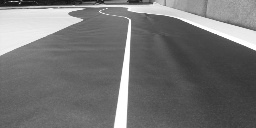

In [180]:
cv2_imshow(img)

In [181]:
for i in train_generator:
  break

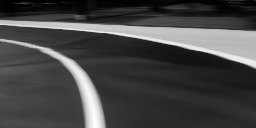

In [182]:
cv2_imshow(i[0][0])

In [183]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit_generator(train_generator,steps_per_epoch=8, epochs=300, verbose=1)

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


8/8 [==============================] - 1s 66ms/step - loss: 210819.6719 - mean_squared_error: 210819.6719
Epoch 2/300
8/8 [==============================] - 1s 103ms/step - loss: 89047.5938 - mean_squared_error: 89047.5938
Epoch 3/300
8/8 [==============================] - 1s 71ms/step - loss: 77460.7188 - mean_squared_error: 77460.7188
Epoch 4/300
8/8 [==============================] - 1s 64ms/step - loss: 77274.5312 - mean_squared_error: 77274.5312
Epoch 5/300
8/8 [==============================] - 1s 67ms/step - loss: 55099.6055 - mean_squared_error: 55099.6055
Epoch 6/300
8/8 [==============================] - 1s 66ms/step - loss: 63625.2188 - mean_squared_error: 63625.2188
Epoch 7/300
8/8 [==============================] - 1s 66ms/step - loss: 62115.9258 - mean_squared_error: 62115.9258
Epoch 8/300
8/8 [==============================] - 1s 63ms/step - loss: 54809.1758 - mean_squared_error: 54809.1758
Epoch 9/300
8/8 [==============================] - 1s 67ms/step - loss: 55571.121

In [184]:
model.predict_generator(valid_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[ 691.70544,  892.2043 ],
       [ 724.03186,  771.65405],
       [ 607.415  ,  895.9923 ],
       [ 739.06915,  764.7403 ],
       [ 799.2254 ,  653.51025],
       [ 857.31976,  607.693  ],
       [ 871.54016,  624.5856 ],
       [ 813.48206,  761.10846],
       [ 677.34735,  887.3742 ],
       [ 669.4545 ,  891.99274],
       [ 680.1917 ,  883.3692 ],
       [ 696.1307 ,  868.01154],
       [ 611.6101 ,  936.0194 ],
       [ 935.55695,  811.57153],
       [ 829.80914,  912.54614],
       [ 670.62366,  891.56006],
       [ 767.5462 ,  870.3357 ],
       [ 679.63007,  853.26373],
       [ 677.0437 ,  882.9559 ],
       [ 693.14264,  879.45184],
       [ 553.2051 ,  994.3303 ],
       [ 635.9998 ,  683.25134],
       [ 686.01904,  883.8375 ],
       [ 707.13934,  816.1858 ],
       [ 782.6116 ,  775.1361 ],
       [ 566.26245,  998.40436],
       [ 677.51697,  885.5096 ],
       [ 681.04895,  976.41113],
       [ 922.7271 ,  630.86847],
       [ 675.90204,  887.7947 ],
       [ 7

In [185]:
final_df[233:234]["image"].values[0]

'752.jpg'

In [201]:
final_df[146:147]

image    X    Y
146  491.jpg  913  531

In [202]:
from google.colab.patches import cv2_imshow
print("Path - ",os.path.join('data',final_df[146:147]["image"].values[0]))
img = cv2.imread(os.path.join('data',final_df[146:147]["image"].values[0]))

Path -  data/491.jpg


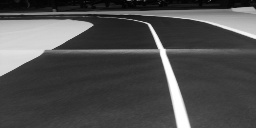

In [203]:
cv2_imshow(img)

In [204]:
model.predict(img.reshape(1,128,256,3))

array([[861.0833, 613.451 ]], dtype=float32)

In [211]:
i[0][1].shape

(128, 256, 3)

In [127]:
i[1][0]

array([860, 765])

In [214]:
model.save("model.pb")

INFO:tensorflow:Assets written to: model.pb/assets


In [209]:
def predict(img):
  img = img.reshape(1,128,256,3)
  pred = model.predict(img)
  x = int(np.ceil(pred[0][0]))
  y = int(np.ceil(pred[0][1]))
  return x, y

In [210]:
predict(img)

(862, 614)

In [213]:
!pwd

/content/drive/MyDrive/DeepLearningColab/CNN/UGV


In [215]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model("model.pb") # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

# Load tflite Model 

In [245]:
tflite_interpreter = tf.lite.Interpreter(model_path='model.tflite')
tflite_interpreter.allocate_tensors()

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
print("name:", input_details[0]['name'])
print("shape:", input_details[0]['shape'])
print("type:", input_details[0]['dtype'])

print("\n== Output details ==")
print("name:", output_details[0]['name'])
print("shape:", output_details[0]['shape'])
print("type:", output_details[0]['dtype'])

== Input details ==
name: serving_default_conv2d_9_input:0
shape: [  1 128 256   3]
type: <class 'numpy.float32'>

== Output details ==
name: StatefulPartitionedCall:0
shape: [1 2]
type: <class 'numpy.float32'>


In [258]:
def predict(img,input_details,output_details):
  img = img.reshape(128,256,3)
  img = np.float32(img)
  input_tensor= np.array(np.expand_dims(img,0), dtype=np.float32)

  tflite_interpreter.set_tensor(input_details[0]['index'],input_tensor)
  tflite_interpreter.invoke()
  output_details = tflite_interpreter.get_output_details()

  pred = tflite_interpreter.get_tensor(output_details[0]['index'])
  result = np.squeeze(pred)
  x, y = int(np.ceil(result[0])) , int(np.ceil(result[1]))
  return x, y

In [259]:
predict(img,input_details,output_details)

(862, 614)